In [2]:
from crawfish.utils.testing import EXAMPLE_CALC_DIRS_DIR
from __future__ import annotations
import numpy as np
from numba import jit
from crawfish.utils.typing import REAL_DTYPE, COMPLEX_DTYPE
import numpy as np
ex_dir = EXAMPLE_CALC_DIRS_DIR / "N2_bare_min"
from crawfish.core.elecdata import ElecData
edata = ElecData.from_calc_dir(ex_dir)
import matplotlib.pyplot as plt

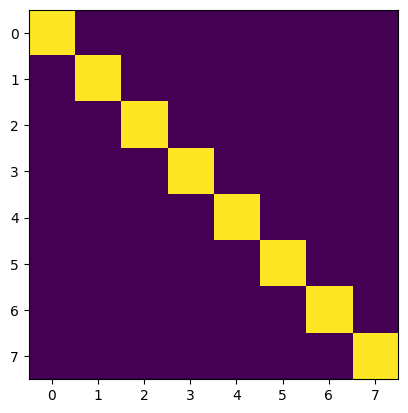

In [19]:
edata = ElecData.from_calc_dir(ex_dir)
nproj = edata.nproj
edata.norm_projs_t1()
proj_sabcju = edata.proj_sabcju
proj_ju = proj_sabcju[0,0,0,0,:nproj,:]
dual_proj_ju = np.linalg.inv(proj_ju)
plt.imshow(np.dot(proj_ju, dual_proj_ju).real)

# Perform LOS on c_yj -> tilde{c}_yj

(54, 15, 8)


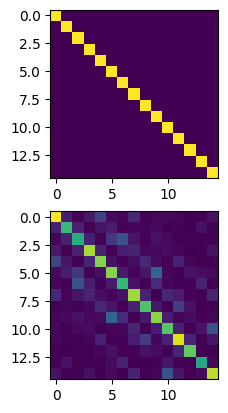

In [2]:
edata = ElecData.from_calc_dir(ex_dir)
edata.norm_projs_t2()
c_tju = edata.proj_tju
print(np.shape(c_tju))
for j in range(edata.nbands):
    norm = np.dot(np.conj(c_tju[:, j, :]).flatten().T, c_tju[:, j, :].flatten())
    c_tju[:, j, :] /= np.sqrt(norm)
c_yj = np.reshape(c_tju, [edata.nstates*edata.nproj, edata.nbands])
s_jj = np.dot(c_yj.T.conj(), c_yj) # Big S
eigs, low_u = np.linalg.eigh(s_jj)
ss_jj = np.dot(low_u.T.conj(), np.dot(s_jj, low_u)) # Little s
nsqrt_ss_jj = np.eye(edata.nbands) * (eigs**(-.5)) # Little s^(-1/2)
low_s_jj = np.dot(low_u, np.dot(nsqrt_ss_jj, low_u.T.conj())) # Big S^(-1/2)
low_c_yj = np.dot(c_yj, low_s_jj) # LOS projection coefficients
low_c_sabcju = np.reshape(low_c_yj, np.shape(edata.proj_sabcju))
LL = np.dot(low_c_yj.T.conj(), low_c_yj)
LO = np.dot(low_c_yj.T.conj(), c_yj)
fig,ax = plt.subplots(nrows=2)
ax[0].imshow(np.abs(LL))
ax[1].imshow(np.abs(LO))

In [1]:
proj_sabcju = edata.proj_sabcju
dual_proj_sabcju = 1/proj_sabcju

NameError: name 'edata' is not defined

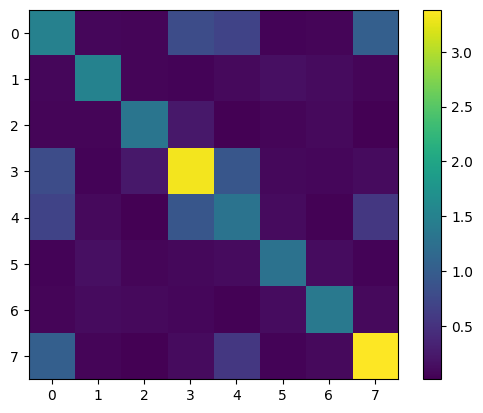

In [19]:
S_uu = np.tensordot(low_c_sabcju.conj().T, low_c_sabcju, axes=([5, 4, 3, 2, 1], [0, 1, 2, 3, 4]))
plt.imshow(np.abs(S_uu))
plt.colorbar()

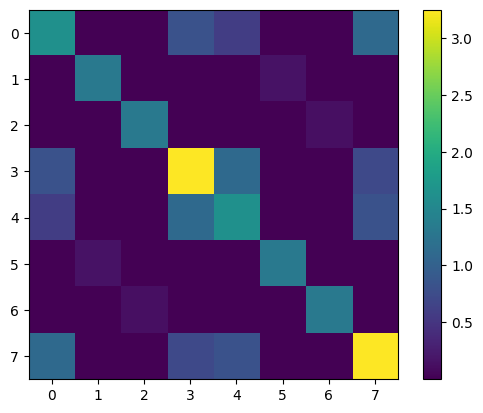

In [22]:
proj_sabcju = edata.proj_sabcju
S_uu = np.tensordot(proj_sabcju.conj().T, proj_sabcju, axes=([5, 4, 3, 2, 1], [0, 1, 2, 3, 4]))
plt.imshow(np.abs(S_uu))
plt.colorbar()

In [15]:
e_sabcj = edata.e_sabcj
elow_c_sabcju = low_c_sabcju.copy()
for u in range(edata.nproj):
    elow_c_sabcju[:,:,:,:,:,u] *= e_sabcj

/var/folders/v3/dhcqls6s33s55hmm47b0wr500000gn/T/ipykernel_61298/3221006409.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


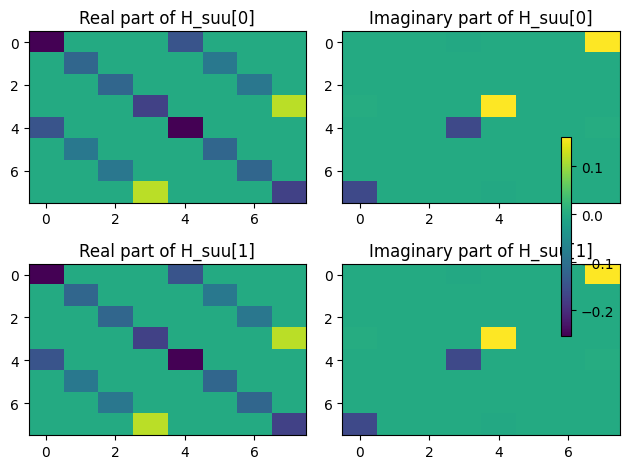

In [58]:
e_sabcj = edata.e_sabcj
e_proj_sabcju = proj_sabcju.copy()
for u in range(edata.nproj):
    e_proj_sabcju[:,:,:,:,:,u] *= e_sabcj
low_proj_sabcju = low_c_sabcju.copy()
elow_proj_sabcju = elow_c_sabcju.copy()
H_ssuu = np.tensordot(proj_sabcju.conj().T, e_proj_sabcju, axes=([4,3,2,1], [1, 2, 3, 4]))
np.shape(H_ssuu)
H_suu = np.array([H_ssuu[:, 0, 0, :], H_ssuu[:, 1, 1, :]])

# Assuming H_suu is already defined
# H_suu = ...

# Determine the global min and max values for the color scale
vmin = min(np.real(H_suu[0]).min(), np.imag(H_suu[0]).min(), np.real(H_suu[1]).min(), np.imag(H_suu[1]).min())
vmax = max(np.real(H_suu[0]).max(), np.imag(H_suu[0]).max(), np.real(H_suu[1]).max(), np.imag(H_suu[1]).max())

fig, axs = plt.subplots(2, 2)

# Plot real component of H_suu[0]
im0 = axs[0, 0].imshow(np.real(H_suu[0]), aspect='auto', vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Real part of H_suu[0]')

# Plot imaginary component of H_suu[0]
im1 = axs[0, 1].imshow(np.imag(H_suu[0]), aspect='auto', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Imaginary part of H_suu[0]')

# Plot real component of H_suu[1]
im2 = axs[1, 0].imshow(np.real(H_suu[1]), aspect='auto', vmin=vmin, vmax=vmax)
axs[1, 0].set_title('Real part of H_suu[1]')

# Plot imaginary component of H_suu[1]
im3 = axs[1, 1].imshow(np.imag(H_suu[1]), aspect='auto', vmin=vmin, vmax=vmax)
axs[1, 1].set_title('Imaginary part of H_suu[1]')

# Add a single colorbar for all subplots
cbar = fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()



/var/folders/v3/dhcqls6s33s55hmm47b0wr500000gn/T/ipykernel_61298/1501689683.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


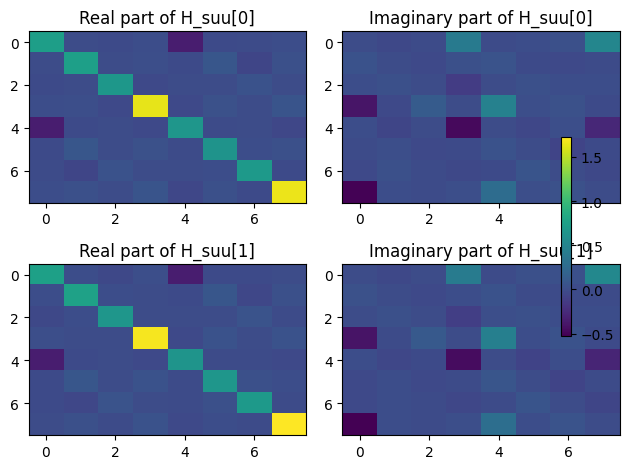

In [56]:
e_sabcj = edata.e_sabcj
e_proj_sabcju = proj_sabcju.copy()
for u in range(edata.nproj):
    e_proj_sabcju[:,:,:,:,:,u] *= e_sabcj
low_proj_sabcju = low_c_sabcju.copy()
H_ssuu = np.tensordot(low_proj_sabcju.conj().T, low_proj_sabcju, axes=([4,3,2,1], [1, 2, 3, 4]))
np.shape(H_ssuu)
H_suu = np.array([H_ssuu[:, 0, 0, :], H_ssuu[:, 1, 1, :]])

# Assuming H_suu is already defined
# H_suu = ...

# Determine the global min and max values for the color scale
vmin = min(np.real(H_suu[0]).min(), np.imag(H_suu[0]).min(), np.real(H_suu[1]).min(), np.imag(H_suu[1]).min())
vmax = max(np.real(H_suu[0]).max(), np.imag(H_suu[0]).max(), np.real(H_suu[1]).max(), np.imag(H_suu[1]).max())

fig, axs = plt.subplots(2, 2)

# Plot real component of H_suu[0]
im0 = axs[0, 0].imshow(np.real(H_suu[0]), aspect='auto', vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Real part of H_suu[0]')

# Plot imaginary component of H_suu[0]
im1 = axs[0, 1].imshow(np.imag(H_suu[0]), aspect='auto', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Imaginary part of H_suu[0]')

# Plot real component of H_suu[1]
im2 = axs[1, 0].imshow(np.real(H_suu[1]), aspect='auto', vmin=vmin, vmax=vmax)
axs[1, 0].set_title('Real part of H_suu[1]')

# Plot imaginary component of H_suu[1]
im3 = axs[1, 1].imshow(np.imag(H_suu[1]), aspect='auto', vmin=vmin, vmax=vmax)
axs[1, 1].set_title('Imaginary part of H_suu[1]')

# Add a single colorbar for all subplots
cbar = fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
c_sabcju = c_tju.reshape(np.shape(edata.proj_sabcju))
m_ujju = np.tensordot(c_sabcju.conj().T, c_sabcju, axes=[(5,4,3,2), (0,1,2,3)])
low_m_ujju = np.tensordot(low_c_sabcju.conj().T, low_c_sabcju, axes=[(5,4,3,2), (0,1,2,3)])
s_ujju = low_m_ujju / m_ujju
s_uu = np.average(s_ujju, axis=(1,2))
s_uu = np.array(s_uu, dtype=COMPLEX_DTYPE)
print(np.shape(m_ujju))
print(c_ju.dtype)
print(s_uu.dtype)
# c_ju = np.sum(c_sabcju, axis=(0,1,2,3))
# low_c_ju = np.sum(low_c_sabcju, axis=(0,1,2,3))

# def get_s_uujj(c_ju: np.ndarray, low_c_ju: np.ndarray) -> np.ndarray:
#     nbands = c_ju.shape[0]
#     nproj = c_ju.shape[1]
#     s_uujj = np.zeros((nproj, nproj, nbands, nbands), dtype=COMPLEX_DTYPE)
#     return _get_s_uujj_jit(c_ju, low_c_ju, s_uujj, nbands, nproj)

# @jit(nopython=True)
# def _get_s_uujj_jit(c_ju: np.ndarray, low_c_ju: np.ndarray, s_uujj: np.ndarray, nbands: int, nproj: int):
#     for u in range(nproj):
#         for v in range(nproj):
#             for j in range(nbands):
#                 for k in range(nbands):
#                     s_uujj[u, v, j, k] = (np.conj(low_c_ju[j, u]) * low_c_ju[k, v]) / (np.conj(c_ju[j, u]) * c_ju[k, v])
#     return s_uujj

# s_uujj = get_s_uujj(c_ju, low_c_ju)
# c_jy = np.swapaxes(c_yj, 0, 1)
# low_c_jy = np.swapaxes(low_c_yj, 0, 1)
# s_uujj = get_s_uujj(c_jy, low_c_jy)
# s_uu = np.average(s_uujj, axis=(2,3))

def test_s_uu(c_ju:np.ndarray, s_uu: np.ndarray):
    nbands = c_ju.shape[0]
    nproj = c_ju.shape[1]
    OO = np.zeros((nbands, nbands), dtype=COMPLEX_DTYPE)
    return _test_s_uu_jit(c_ju, s_uu, OO, nbands, nproj)


#@jit(nopython=True)
def _test_s_uu_jit(c_ju: np.ndarray, s_uu: np.ndarray, OO: np.ndarray, nbands: int, nproj: int):
    for u in range(nproj):
        for v in range(nproj):
            for j in range(nbands):
                for k in range(nbands):
                    OO[j, k] += s_uu[u, v] * np.conj(c_ju[j, u]) * c_ju[k, v]
    return OO

print(np.shape(c_ju))
print(np.shape(s_uu))
OO = test_s_uu(c_ju, s_uu)
plt.imshow(np.abs(OO))



(8, 15, 15, 8)
complex64
complex64
(8, 15, 15, 8)
(8, 8)


TypeError: only length-1 arrays can be converted to Python scalars